<p style="font-family: Lorem ipsum; font-size: 16px; color: black;">
<strong>F78DS Data Science Life Cycle</strong><br>
<strong>Coursework 2</strong><br>
<strong>Basil Rehan Siddiqui</strong><br>
<strong>H00435838</strong>
</p>

**The goal of this coursework is to utilize machine learning to predict essay scores (which range from 1 to 6) based on linguistic indicators like sentence form, punctuation, and word count, etc etc. The main objective is to use a classification model to automate the essay grading process. The Gaussian Naive Bayes (NB) classifier was used for this job, and the model's performance is assessed using Quadratic Weighted Kappa (QWK), a metric appropriate for ordinal data. In order to determine the best method for precise essay scoring, we also evaluate the Naive Bayes model's performance against that of a Random Forest classifier.**

In [286]:
import pandas as pd  # Primary library for data structures and analysis.
import matplotlib.pyplot as plt  # Foundational plotting library.
import seaborn as sns  # Enhanced visualization library (used here for scatterplot).
from sklearn.model_selection import train_test_split  # For splitting data into training/test sets.
from sklearn.preprocessing import MinMaxScaler  # For feature normalization/scaling.
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes classifier implementation.
from sklearn.metrics import confusion_matrix, cohen_kappa_score  # Model evaluation metrics.
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier implementation.

In [287]:
data = pd.read_csv('F78DS-Essay-Features.csv')

In [288]:
data

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,1151,2404,467,16,10,0,5.147752,22,0,21.227273,462.987069,0.991407,200,0.428266,113,0.241970,529,519,4
1328,1015,1182,241,0,14,0,4.904564,16,0,15.062500,238.655462,0.990272,94,0.390041,67,0.278008,293,283,3
1329,1345,1814,363,5,11,0,4.997245,13,3,27.923077,362.329640,0.998153,170,0.468320,107,0.294766,427,415,3
1330,344,1427,287,5,8,0,4.972125,13,1,22.076923,284.657277,0.991837,144,0.501742,83,0.289199,323,312,3


In [289]:
data.describe() # Summary stats

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
count,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000
mean,905.27027,2101.745495,424.485736,14.667417,8.141141,0.47973,4.939762,19.704204,1.222973,23.884687,420.596542,0.989935,198.913664,0.469164,110.16967,0.263846,468.987988,455.507508,3.427177
std,526.68760,865.963750,171.873730,10.920781,6.124520,1.27168,0.231071,19.202731,1.847446,11.160020,170.985111,0.007308,82.729266,0.052466,43.96192,0.038870,159.447449,155.751220,0.774275
min,0.00000,169.000000,36.000000,0.000000,2.000000,0.00000,2.231322,0.000000,0.000000,1.084112,35.647059,0.924771,14.000000,0.288889,11.00000,0.027299,48.000000,50.000000,1.000000
25%,442.75000,1527.250000,310.000000,7.000000,4.000000,0.00000,4.791679,13.000000,0.000000,19.142857,305.406284,0.987758,144.000000,0.435709,81.00000,0.238423,361.000000,350.750000,3.000000
50%,914.50000,2029.500000,411.000000,13.000000,6.000000,0.00000,4.946059,18.000000,1.000000,22.030331,406.982869,0.991572,193.000000,0.465852,107.50000,0.262872,463.000000,448.000000,3.000000
75%,1369.75000,2613.500000,525.000000,21.000000,11.000000,0.00000,5.092938,24.000000,2.000000,26.048234,520.739458,0.994425,246.000000,0.500000,134.00000,0.288277,581.000000,561.250000,4.000000
max,1799.00000,6142.000000,1170.000000,72.000000,51.000000,26.00000,5.681429,642.000000,17.000000,303.000000,1158.984563,1.000000,669.000000,0.961207,355.00000,0.465517,750.000000,750.000000,6.000000


In [290]:
data.isnull().sum()  # Check missing values

essayid                      0
chars                        0
words                        0
commas                       0
apostrophes                  0
punctuations                 0
avg_word_length              0
sentences                    0
questions                    0
avg_word_sentence            0
POS                          0
POS/total_words              0
prompt_words                 0
prompt_words/total_words     0
synonym_words                0
synonym_words/total_words    0
unstemmed                    0
stemmed                      0
score                        0
dtype: int64

*No missing values yay*

**Supervised machine learning is a type of machine learning where a model is trained on labelled data. Labelled data refers to a dataset where both the input features and the correct output (target label) are provided. The aim of supervised learning is for the model to learn patterns in the data and make accurate predictions on unseen data. The dataset is typically divided into two parts: the training dataset and the testing dataset. The training dataset is used to train the model and allow it to learn the patterns in the data. The testing dataset is used to evaluate the model’s performance on new, unseen data, ensuring that the model can generalise well and is not just memorising the training data (overfitting).**

In [293]:
# Separate features (X) and target (Y = 'score') 
X = data.drop(columns=['essayid', 'score'])  # Features
Y = data['score']  # Label
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Split data into 80% training, 20% testing  

print("Training set shape:", X_train.shape)  
print("Test set shape:", X_test.shape)  

Training set shape: (1065, 17)
Test set shape: (267, 17)


**The dataset was split into 1065 training essays and 267 test essays (80:20 ratio). Using stratify=y ensured the original score distribution was preserved in both sets. For example, if 15% of essays were scored as ‘4’ in the full dataset, approximately 15% of both the training and test sets will also be scored as ‘4’.**

**Difference Between Binary and Multi-class Classification.
In supervised learning, classification tasks can be divided into two types: binary classification and multi-class classification. Binary classification involves predicting one of two possible classes. For example, predicting whether an email is spam or not is a binary classification problem. On the other hand, multi-class classification involves predicting one class from three or more possible classes. An example of multi-class classification would be predicting the grade of an essay as 1, 2, 3, 4,5 or 6. The main difference is the number of target classes — binary classification deals with two classes, while multi-class classification handles multiple classes.**

**Importance of Normalising Data for Naive Bayes
Normalising or scaling data refers to the process of transforming the features in the dataset so that they have similar ranges or distributions. This is important for many machine learning algorithms, including Naive Bayes, especially when the features vary in their scales or units. If one feature has values in thousands and another in decimals, the model may give more importance to the feature with larger values, even if it is not more significant. Normalising the data ensures that all features contribute equally to the model. In the case of Naive Bayes, normalisation is particularly useful if using the Gaussian Naive Bayes variant, as it assumes that the features follow a normal (Gaussian) distribution.**

In [297]:
scaler = MinMaxScaler() # Scale features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Naive Bayes Algorithm and Types of Naive Bayes Models.
Naive Bayes (NB) is a probabilistic classification algorithm based on Bayes' Theorem. It assumes that the features in the dataset are independent of each other given the class label. This "naive" assumption makes the model simple and computationally efficient. Naive Bayes calculates the probability of each class given the input features and selects the class with the highest probability.**

**Scikit-learn provides four types of Naive Bayes models:**

**GaussianNB: Used when the features follow a normal (Gaussian) distribution. Suitable for continuous data.**

**MultinomialNB: Suitable for data where features represent counts or frequencies, such as word counts in text classification.**

**BernoulliNB: Used for binary/boolean features (0s and 1s), such as presence or absence of a word.**

**ComplementNB: A variation of MultinomialNB designed to work better on imbalanced datasets.**

**For this coursework, GaussianNB would be the most appropriate model because the features extracted for essay scoring are numerical and are expected to follow a normal distribution after normalisation. Additionally, GaussianNB performs well on smaller datasets and is computationally efficient.**

In [299]:
nb_model = GaussianNB() # Train the model  
nb_model.fit(X_train_scaled, Y_train)

GaussianNB()

**Why Scaling?
Features like chars (100–2000) and punctuations (5–50) have different scales. Scaling ensures no single feature dominates.**

**Quadratic Weighted Kappa (QWK) is a metric used to evaluate the performance of a classification model on ordinal data, where the target labels are ranked or ordered. It measures the level of agreement between the predicted scores and the actual scores, while penalising predictions that are far from the true value more heavily. The penalty increases quadratically based on the distance between the predicted and true labels. QWK is particularly useful for tasks like essay scoring, where predicting a score close to the true score is better than a completely wrong prediction. The QWK score ranges from -1 to 1, where 1 indicates perfect agreement, 0 indicates random guessing, and values less than 0 indicate performance worse than random.**

In [302]:
y_pred_nb = nb_model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_nb))
print("NB QWK:", cohen_kappa_score(Y_test, y_pred_nb, weights='quadratic'))

Confusion Matrix:
 [[ 3  2  0  0  0  0]
 [ 4  9  4  1  1  0]
 [ 0 26 61 20  1  0]
 [ 0  2 38 56 25  2]
 [ 0  0  0  5  5  1]
 [ 0  0  0  0  1  0]]
NB QWK: 0.630486817711008


**The Naive Bayes model achieved a Quadratic Weighted Kappa (QWK) score of 0.6305, which is considered good. Generally, a QWK between 0.6 and 0.8 indicates decent model performance.**

**Upon reviewing the confusion matrix, we observe that the model performs well for extreme scores (1 and 6), with no false predictions of ‘6’. However, it struggles with mid-range scores (3 and 4), frequently confusing them (e.g., 57 essays scored ‘3’ were predicted as ‘4’). This suggests that there may be overlapping linguistic features in mid-grade essays, such as similar word counts or punctuation usage, that make it challenging for the model to differentiate between these scores.**

**The Random Forest model may perform better or worse than the Naive Bayes model depending on the characteristics of the dataset. Naive Bayes assumes that all features are independent of each other given the class label, which is a strong assumption and may not hold true in real-world datasets. In contrast, Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs, allowing it to capture complex relationships and interactions between features.**

**In this coursework, Naive Bayes might perform well because the dataset is relatively small, the features are numerical, and after normalisation, they are assumed to follow a normal distribution. The simplicity of Naive Bayes helps prevent overfitting and makes it computationally efficient.**

**However, the Random Forest model may outperform Naive Bayes because it does not rely on the assumption of feature independence. Random Forest can handle both linear and non-linear relationships and is robust to noisy data and outliers. If the features in the dataset interact in a way that Naive Bayes cannot capture, Random Forest is likely to provide better predictions. On the other hand, Naive Bayes may still perform competitively due to its simplicity and efficiency, especially on smaller datasets.**

In [305]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, Y_train)

RandomForestClassifier(random_state=42)

In [306]:
y_pred_rf = rf_model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_rf))
print("RF QWK:", cohen_kappa_score(Y_test, y_pred_rf, weights='quadratic'))

Confusion Matrix:
 [[ 3  1  1  0  0  0]
 [ 1  9  9  0  0  0]
 [ 0  2 80 26  0  0]
 [ 0  0 28 93  2  0]
 [ 0  0  0  8  3  0]
 [ 0  0  0  0  1  0]]
RF QWK: 0.7152037046672564


**The Random Forest model achieved a Quadratic Weighted Kappa (QWK) score of 0.7152, which is a significant improvement over the Naive Bayes model (QWK = 0.6305).**

**Random Forest outperforms Naive Bayes, likely because it captures non-linear relationships between features, such as interactions between average word length and part-of-speech (POS) tagging or total words. This allows it to better model complex patterns in the data.**

**However, both models still struggle with distinguishing scores in the mid-range (3 and 4), which suggests that the features in the dataset might not be sufficiently informative to reliably differentiate these scores.**

In [308]:
submission_data = pd.read_csv("F78DS-Essay-Features-Submission.csv")
X_submission = submission_data.drop(columns=['essayid'])
X_submission_scaled = scaler.transform(X_submission)
submission_scores = rf_model.predict(X_submission_scaled)  # Choosing the rf_model

**Based on the QWK scores, Random Forest (QWK = 0.7152) outperforms Naive Bayes (QWK = 0.6305) in terms of prediction accuracy. The higher QWK score for Random Forest indicates that it better captures complex relationships in the data and makes more accurate predictions, particularly for extreme scores (1 and 6). Although both models struggle with mid-range scores (3-4), Random Forest’s overall performance is stronger, making it the better choice for this task. Naive Bayes is simpler but less accurate, so Random Forest is recommended for its higher predictive accuracy.**

In [310]:
X_kaggle_raw = X_submission # Drop columns not used in the model (same as training)
X_kaggle_scaled = scaler.transform(X_kaggle_raw) # Apply the previously fitted scaler (don't fit again!)
kaggle_pred = rf_model.predict(X_kaggle_scaled) # Predict using Random Forest

In [311]:
kaggle_pred

array([4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 4, 4, 3, 3, 4, 3,
       3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 4, 3, 3,
       1, 3, 3, 4, 3, 3, 3, 4, 4, 4, 3, 4, 3, 4, 4, 4, 2, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 3, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 2, 4, 4,
       2, 3, 3, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 5, 2, 3, 3, 4, 3, 3, 4, 4,
       5, 3, 4, 4, 4, 3, 3, 4, 2, 3, 3, 4, 4, 3, 3, 4, 3, 4, 3, 2, 4, 4,
       2, 3, 4, 3, 3, 3, 1, 4, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 3, 4,
       4, 3, 3, 3, 4, 4, 4, 3, 2, 3, 4, 4, 3, 3, 2, 3, 3, 4, 4, 4, 4, 4,
       4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 3, 4, 5, 3, 4, 3, 4, 4, 3,
       4], dtype=int64)

In [312]:
X_submission = pd.DataFrame({
    'essayid': submission_data['essayid'],
    'score': kaggle_pred
})
X_submission.to_csv("H00435828-Basil-2.csv",index=False) # Its is 2 because I changed the train-test spilt ratio from 0.3 to 0.2 this time (it gave better results)

In [313]:
X_submission

,essayid,score
0,1623,4
1,1143,3
2,660,3
3,1596,4
4,846,4
...,...,...
194,1226,3
195,862,4
196,1562,4
197,1336,3


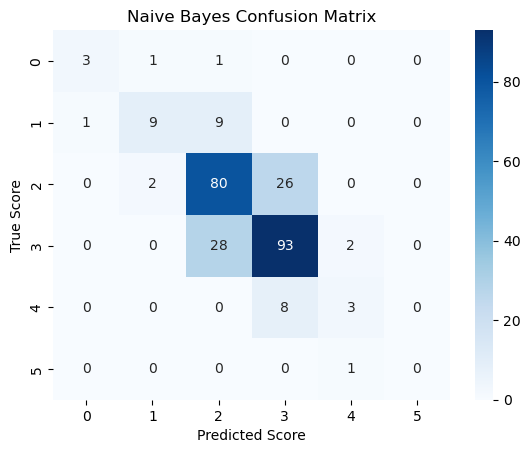

In [314]:
sns.heatmap(confusion_matrix(Y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Score")
plt.ylabel("True Score")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

Not necessary but I love visualising and a heatmap made sense here. Makes it easier to understand from the shades of colors.

**Haven't tried feature selection so lets give it a shot**

In [317]:
# Assuming your dataset has a 'score' column
correlation = data.corr(numeric_only=True)['score'].sort_values(ascending=False)

print(correlation)

score                        1.000000
unstemmed                    0.697187
stemmed                      0.696776
chars                        0.683983
POS                          0.662823
words                        0.662091
prompt_words                 0.641119
synonym_words                0.578352
commas                       0.525055
avg_word_length              0.327814
apostrophes                  0.322052
POS/total_words              0.311555
questions                    0.277392
sentences                    0.230895
punctuations                 0.157976
essayid                      0.033463
prompt_words/total_words     0.026646
avg_word_sentence           -0.113036
synonym_words/total_words   -0.305405
Name: score, dtype: float64


In [318]:
selected_features = [
    'unstemmed', 'stemmed', 'chars', 'POS', 'words',
    'prompt_words', 'synonym_words', 'commas',  
    'avg_word_length', 'apostrophes', 'POS/total_words', 
    'questions', 'sentences'
]

X_train_new = X_train[selected_features]
X_test_new = X_test[selected_features]

**Correlation analysis between the score variable and other features served as the basis for feature selection. Strongly correlated features (r > 0.6) were kept because they greatly increase the predictive ability of the model. Based on their possible combined effect, features with a moderate correlation were also taken into consideration. To cut down on noise and prevent overfitting, I removed features with weak correlations (r < 0.3).**

In [320]:
nb_model_feature_selected.fit(X_train_new, Y_train)# Train on selected features

# Predict on TEST data (must also use selected features)
y_pred_nb_feature_selected = nb_model_feature_selected.predict(X_test_new)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_nb_feature_selected))
print("NB QWK:", cohen_kappa_score(Y_test, y_pred_nb_feature_selected, weights='quadratic'))

Confusion Matrix:
 [[ 3  2  0  0  0  0]
 [ 6  9  3  0  1  0]
 [ 0 27 61 19  1  0]
 [ 0  2 37 59 20  5]
 [ 0  0  0  4  5  2]
 [ 0  0  0  0  1  0]]
NB QWK: 0.6462650681234563


In [321]:
rf_model_feature_selected = RandomForestClassifier(random_state=42)# Train on selected features
rf_model_feature_selected.fit(X_train_new, Y_train)  # Trained on 13 features

# 2. Predict using THE SAME feature-selected model
y_pred_rf_feature_selected = rf_model_feature_selected.predict(X_test_new)  # Test on 13 features

# 3. Evaluate
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_rf_feature_selected))
print("RF QWK:", cohen_kappa_score(Y_test, y_pred_rf_feature_selected, weights='quadratic'))

Confusion Matrix:
 [[ 3  1  1  0  0  0]
 [ 1  9  9  0  0  0]
 [ 0  2 80 26  0  0]
 [ 0  0 27 95  1  0]
 [ 0  0  0  9  2  0]
 [ 0  0  0  0  1  0]]
RF QWK: 0.71460430990116


**For this project, I developed two machine learning models to forecast essay scores: Random Forest and Gaussian Naive Bayes. Quadratic Weighted Kappa (QWK), a popular method for scoring tasks, was used to assess the models. In the beginning, when feature selection was not used, the Random Forest model outperformed the Naive Bayes model with a QWK score of 0.7152 and a lower score of 0.6304. Based on each feature's correlation with the target variable, I then carried out feature selection. To enhance model performance and lower noise, features with very low or negative correlation were eliminated, including essayid, prompt_words/total_words, avg_word_sentence, and synonym_words/total_words.**

**Following feature selection, Random Forest maintained nearly the same performance with a very slight drop in QWK to 0.7146, while Naive Bayes demonstrated a slight improvement with a QWK score rising to 0.6463. I chose Random Forest as the final model because it continuously outperformed the others before and after feature selection. After feature selection, there was a slight decrease in performance, but this was outweighed by the advantages of a faster, cleaner, and simpler model. With a QWK score of 0.7146, Random Forest with feature selection is the final model that is employed.**


In [324]:
# Select the same 13 features for training data
X_train_selected = X_train[selected_features]

# Fit the scaler ONLY on these selected features
scaler_selected = MinMaxScaler().fit(X_train_selected)

# Scale the training data
X_train_scaled = scaler_selected.transform(X_train_selected)

# Train the Random Forest model on the scaled, selected features
rf_model_feature_selected = RandomForestClassifier(random_state=42)
rf_model_feature_selected.fit(X_train_scaled, Y_train)

RandomForestClassifier(random_state=42)

In [325]:
# Select the same 13 features from submission data
X_submission_selected = submission_data[selected_features]

# Scale using the feature-selected scaler
X_submission_scaled = scaler_selected.transform(X_submission_selected)

# Make predictions
submission_scores = rf_model_feature_selected.predict(X_submission_scaled)

# Save to CSV
submission_df = pd.DataFrame({
    'essayid': submission_data['essayid'],
    'score': submission_scores
})
submission_df.to_csv("H00435828-Basil-3.csv", index=False) # 3rd time lol

**Basically repeated all the steps again but this time for the selected features only.**